In [1]:
import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing SK-learn to calculate precision and recall
import sklearn
import sklearn.metrics

# Used for graph export
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K

tf.__version__

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'1.5.0'

In [2]:
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# normalize to a scale between 0 and 1
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Text(0.5,1,'Label for image 6 is: 0')

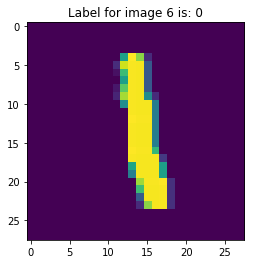

In [4]:
i = 6
plt.imshow(x_train[i].reshape(28, 28)) #np.sqrt(784) = 28
plt.title("Label for image %i is: %s" % (i, np.argmax(y_train[i])))

Text(0.5,1,'Label for image 5000 is: 0')

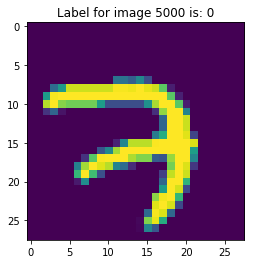

In [5]:
i = 5000
plt.imshow(x_train[i].reshape(28, 28)) #np.sqrt(784) = 28
plt.title("Label for image %i is: %s" % (i, np.argmax(y_train[i])))

## GPU and CPU settings
If GPU is not available, comment out the bottom block.

In [6]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Only for the tutorial to limit the memory usage per running script on the server
config.gpu_options.per_process_gpu_memory_fraction = 0.1

tf.keras.backend.set_session(tf.Session(config=config))

In [7]:
########## HYPER PARAMETERS
batch_size = 128
epochs = 10
optimizer = tf.keras.optimizers.RMSprop()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
########## MODEL ARCHITECTURE

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_one_hot))
score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


y_test_pred = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

print ('\n Summary of the precision, recall, F1 score for each class:')
print (sklearn.metrics.classification_report(y_test, y_test_pred))

print ('\n Confusion matrix: ')
print (sklearn.metrics.confusion_matrix(y_test, y_test_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================]60000/60000 [==============================] - 4s 73us/step - loss: 1.3114 - acc: 0.5838 - val_loss: 0.7553 - val_acc: 0.7943

Epoch 2/10
60000/60000 [==============================]60000/60000 [==============================] - 4s 71us/step - loss: 0.6527 - acc: 0.8170 - val_loss: 0.

# Saving model

In [ ]:
model.save("myModel.h5")